In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analise dos Dados do Enem 2019

In [ ]:
#dados do enem 2019 de provas feitas em Minas Gerais
#https://drive.google.com/file/d/1uckzyjRBKPFEAp2ZN0EsV1nmHWolr93c/view?usp=sharing
dados = pd.read_csv('mg.csv',';')

In [ ]:
#tamanho total dos dados crus
dados.shape

(538896, 87)

In [ ]:
#Nota total igual Ciencias da Natureza, ciencias humanas, matematica, linguagem e codigos, redação / 5
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
dados[notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,512.6,564.6,626.4,533.4,860.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,621.0,654.4,726.8,595.8,800.0


In [ ]:
#limpando os dados tirando todos que tiraram 0 em alguma materia e todos os treineiros
dados = dados.query('NU_NOTA_CN > 0')
dados = dados.query('NU_NOTA_CH > 0')
dados = dados.query('NU_NOTA_MT > 0')
dados = dados.query('NU_NOTA_LC > 0')
dados = dados.query('NU_NOTA_REDACAO > 0')
dados = dados.query('IN_TREINEIRO == 0')
dados[notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,512.6,564.6,626.4,533.4,860.0
4,621.0,654.4,726.8,595.8,800.0
6,469.8,575.4,412.3,525.8,600.0
7,353.0,507.3,610.6,536.2,740.0
9,505.2,566.5,579.2,572.5,560.0


In [ ]:
#total dos dados 
dados.shape

(325462, 87)

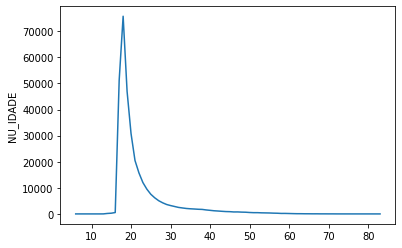

In [ ]:
#Gráfico de idade 
temp = dados['NU_IDADE'].value_counts().sort_index()
sns.lineplot(data=temp)

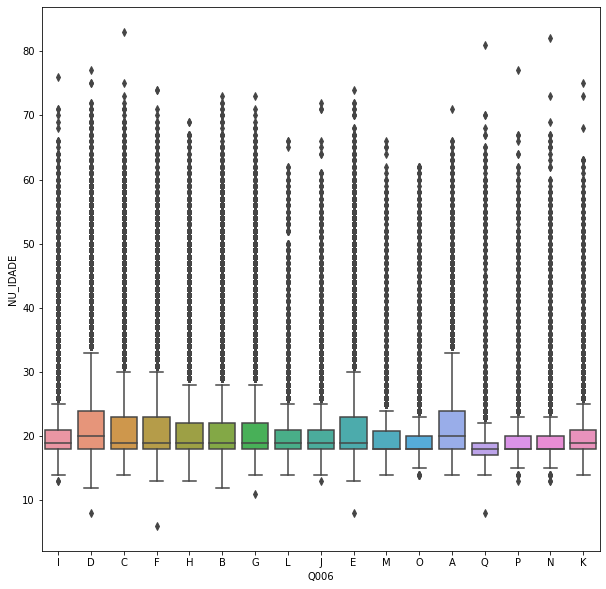

In [ ]:
#Boxplot de idade
plt.figure(figsize=(10,10))
sns.boxplot(x='Q006', y='NU_IDADE', data= dados)

In [ ]:
#Total de idade em ordem de recorrencia 
dados['NU_IDADE'].value_counts()

18    75729
17    51221
19    46954
20    30784
21    20476
      ...  
83        1
82        1
76        1
81        1
6         1
Name: NU_IDADE, Length: 72, dtype: int64

In [ ]:
#criação da coluna nota total
dados['NU_NOTA_TOTAL'] = dados[notas].sum(axis=1)/5
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']

In [ ]:
dados[notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,512.6,564.6,626.4,533.4,860.0,619.40
4,621.0,654.4,726.8,595.8,800.0,679.60
6,469.8,575.4,412.3,525.8,600.0,516.66
7,353.0,507.3,610.6,536.2,740.0,549.42
9,505.2,566.5,579.2,572.5,560.0,556.68


Text(0, 0.5, 'Nota Total')

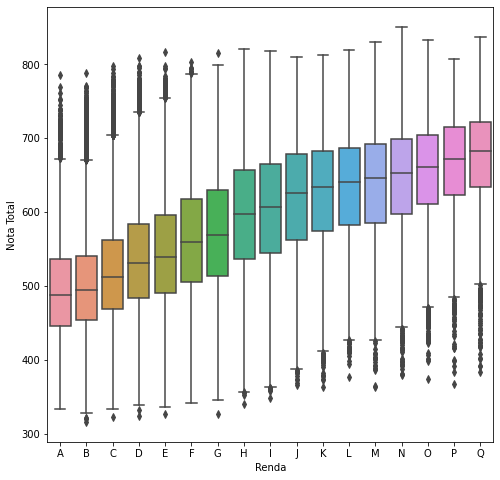

In [ ]:
rendaOrdenada = dados['Q006'].unique()
rendaOrdenada.sort()
plt.figure(figsize=(8,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data= dados, order= rendaOrdenada)
plt.xlabel('Renda')
plt.ylabel('Nota Total')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

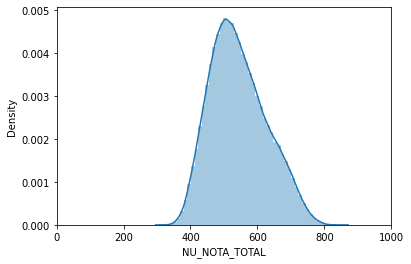

In [ ]:
sns.distplot(dados["NU_NOTA_TOTAL"])
plt.xlim(0,1000)

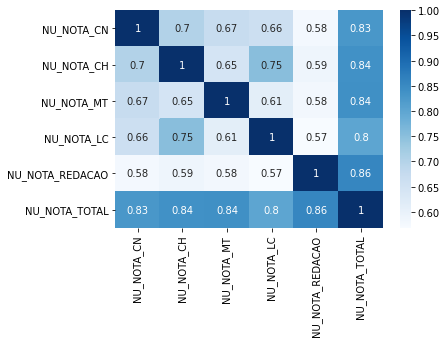

In [ ]:
#correlção das notas por materia 
correlacao = dados[notas].corr()
sns.heatmap(correlacao, cmap="Blues", annot=True )

In [ ]:
#calculando o numero munipios unicos
len(dados['NO_MUNICIPIO_RESIDENCIA'].unique())
#Tem registro de todas as cidades de MG

853

In [ ]:
#ordenação de registros por cidade
dados['NO_MUNICIPIO_RESIDENCIA'].value_counts()

Belo Horizonte      48144
Uberlândia          12581
Contagem            11268
Montes Claros       11088
Juiz de Fora        10033
                    ...  
Consolação             16
Comendador Gomes       16
Claraval               14
Serra da Saudade        7
Água Comprida           7
Name: NO_MUNICIPIO_RESIDENCIA, Length: 853, dtype: int64

# IFDM MG

In [ ]:
#dados do IFDM 2016 de Minas Gerais
ifdm = pd.read_csv('IFDM2016.csv',';')
ifdm.shape

(853, 6)

In [ ]:
#A escala de IFDM vai de 0 a 1, multipliquei por 1000 para conseguir manipular mais facilmente 
ifdm['IFDM'] = ifdm['IFDM'].astype(float)
ifdm['IFDM'] = ifdm['IFDM']*1000
ifdm['Emprego & Renda'] = ifdm['Emprego & Renda'].astype(float)
ifdm['Emprego & Renda'] = ifdm['Emprego & Renda']*1000
ifdm['Educação'] = ifdm['Educação'].astype(float)
ifdm['Educação'] = ifdm['Educação']*1000
ifdm['Saúde'] = ifdm['Saúde'].astype(float)
ifdm['Saúde'] = ifdm['Saúde']*1000

In [ ]:
ifdm.describe()

,Ranking Educação,IFDM,Emprego & Renda,Educação,Saúde
count,853.000000,842.000000,842.000000,853.000000,853.000000
mean,427.000000,677.761164,447.089311,813.414068,772.605979
std,246.384185,67.543406,110.401436,52.915089,109.147216
min,1.000000,456.800000,190.600000,602.500000,356.900000
25%,214.000000,634.525000,364.325000,778.100000,707.300000
50%,427.000000,678.100000,442.200000,816.000000,793.500000
75%,640.000000,721.725000,515.275000,852.400000,853.500000
max,853.000000,858.600000,795.500000,979.900000,972.300000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

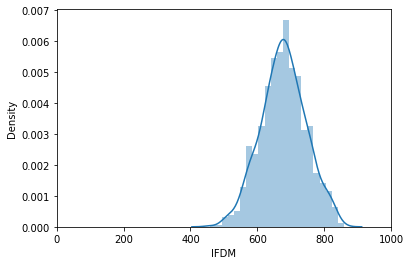

In [ ]:
#Gráfico de recorrencia de IFDM
sns.distplot(ifdm['IFDM'])
plt.xlim(0,1000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

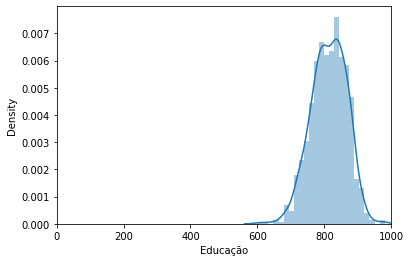

In [ ]:
#Gráfico de recorrencia de IFDM de Educação
sns.distplot(ifdm['Educação'])
plt.xlim(0,1000)

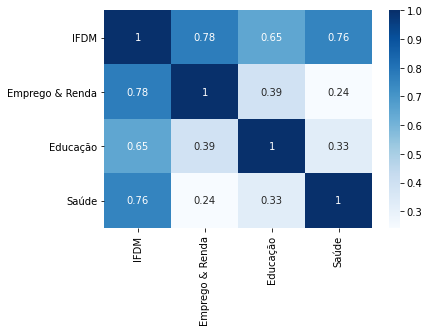

In [ ]:
#Mapa de calor da correlação das catergorias do IFDM
criterios = ['IFDM','Emprego & Renda',	'Educação',	'Saúde']
correlacao = ifdm[criterios].corr()
sns.heatmap(correlacao, cmap="Blues", annot=True )

# Correlação

In [ ]:
dadosRecortado = pd.read_csv('mgRecortado.csv', ';')
dadosRecortado

,NO_MUNICIPIO_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IN_TREINEIRO
0,Uberlândia,512.6,564.6,533.4,626.4,860.0,0
1,Canaã,NaN,NaN,NaN,NaN,NaN,0
2,Araxá,NaN,NaN,NaN,NaN,NaN,0
3,Belo Horizonte,NaN,NaN,NaN,NaN,NaN,0
4,São João da Ponte,621.0,654.4,595.8,726.8,800.0,0
...,...,...,...,...,...,...,...
538891,Uberaba,453.6,446.2,446.9,467.9,260.0,0
538892,São João do Paraíso,527.6,534.4,543.3,537.9,600.0,0
538893,Capinópolis,473.7,380.7,499.6,369.3,560.0,0
538894,Ribeirão das Neves,464.4,415.8,510.5,473.0,480.0,0


In [ ]:
dadosRecortado = dadosRecortado.query('NU_NOTA_CN > 0')
dadosRecortado = dadosRecortado.query('NU_NOTA_CH > 0')
dadosRecortado = dadosRecortado.query('NU_NOTA_MT > 0')
dadosRecortado = dadosRecortado.query('NU_NOTA_LC > 0')
dadosRecortado = dadosRecortado.query('NU_NOTA_REDACAO > 0')
dadosRecortado = dadosRecortado.query('IN_TREINEIRO == 0')
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
dadosRecortado['NU_NOTA_TOTAL'] = dados[notas].sum(axis=1)/5
dadosRecortado = dadosRecortado.drop(columns=['NU_NOTA_CN'])
dadosRecortado = dadosRecortado.drop(columns=['NU_NOTA_LC'])
dadosRecortado = dadosRecortado.drop(columns=['NU_NOTA_MT'])
dadosRecortado = dadosRecortado.drop(columns=['NU_NOTA_CH'])
dadosRecortado = dadosRecortado.drop(columns=['NU_NOTA_REDACAO'])
dadosRecortado = dadosRecortado.drop(columns=['IN_TREINEIRO'])
dadosRecortado

,NO_MUNICIPIO_RESIDENCIA,NU_NOTA_TOTAL
0,Uberlândia,619.40
4,São João da Ponte,679.60
6,Três Corações,516.66
7,Betim,549.42
9,Três Corações,556.68
...,...,...
538890,Ibirité,539.02
538891,Uberaba,414.92
538892,São João do Paraíso,548.64
538893,Capinópolis,456.66


In [ ]:
dadosRecortado['NU_NOTA_TOTAL'] = pd.to_numeric(dadosRecortado['NU_NOTA_TOTAL'])
dadosRecortado

,NO_MUNICIPIO_RESIDENCIA,NU_NOTA_TOTAL
0,Uberlândia,619.40
4,São João da Ponte,679.60
6,Três Corações,516.66
7,Betim,549.42
9,Três Corações,556.68
...,...,...
538890,Ibirité,539.02
538891,Uberaba,414.92
538892,São João do Paraíso,548.64
538893,Capinópolis,456.66


In [ ]:
listaMun = dadosRecortado.sort_values(['NO_MUNICIPIO_RESIDENCIA'])
listaMun = dadosRecortado.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()
listaMun

,NU_NOTA_TOTAL
NO_MUNICIPIO_RESIDENCIA,
Abadia dos Dourados,534.788941
Abaeté,547.275935
Abre Campo,533.738023
Acaiaca,488.947660
Aguanil,528.066800
...,...
Wenceslau Braz,555.699444
Água Boa,531.717187
Água Comprida,531.040000


In [ ]:
ifdm

,Município,Ranking Educação,IFDM,Emprego & Renda,Educação,Saúde
0,Abadia dos Dourados,309,708.8,499.3,836.0,791.1
1,Abaeté,250,655.2,491.3,846.1,628.2
2,Abre Campo,559,641.4,436.7,792.2,695.3
3,Acaiaca,344,681.1,345.7,831.3,866.2
4,Açucena,829,674.4,407.2,712.1,903.8
...,...,...,...,...,...,...
848,Wenceslau Braz,507,731.9,450.2,801.4,944.1
849,Água Boa,704,507.0,400.5,763.6,356.9
850,Água Comprida,169,755.8,535.9,861.1,870.5
851,Águas Formosas,505,602.0,461.5,801.8,542.8


In [ ]:
#listaMun.to_excel("output.xlsx") 

In [ ]:
resultado = pd.read_csv('mesclado.csv',';')

In [ ]:
resultado.sort_values('Nota', ascending=False)

,Municipio,Nota,IFDM,Renda,Educação
290,Formiga,582.025567,0.8301,0.6864,0.9126
844,Viçosa,574.033403,0.8024,0.6859,0.8675
165,Cataguases,573.066695,0.7603,0.5733,0.8522
43,Araxá,572.590225,0.8100,0.6936,0.9241
571,Pedra do Indaiá,572.585294,0.7427,0.5133,0.8354
...,...,...,...,...,...
222,Crisólita,463.603784,0.5035,0.3328,0.7201
671,Santa Fé de Minas,463.118431,0.6838,0.4579,0.7365
472,Matias Cardoso,462.018605,0.6561,0.4655,0.7193
729,São João das Missões,457.402722,0.5547,0.3525,0.6025


In [ ]:
resultado

,Municipio,Nota,IFDM,Renda,Educação
0,Abadia dos Dourados,534.788941,0.7088,0.4993,0.8360
1,Abaeté,547.275936,0.6552,0.4913,0.8461
2,Abre Campo,533.738023,0.6414,0.4367,0.7922
3,Acaiaca,488.947660,0.6811,0.3457,0.8313
4,Açucena,515.603944,0.6744,0.4072,0.7121
...,...,...,...,...,...
848,Virginópolis,548.276106,0.6176,0.3768,0.7948
849,Virgolândia,509.596923,0.6813,0.3371,0.7802
850,Visconde do Rio Branco,558.753975,0.7410,0.6084,0.8545
851,Volta Grande,528.737838,0.6789,0.4499,0.7862


In [ ]:
resultado['IFDM'] = resultado['IFDM']*1000
resultado['Renda'] = resultado['Renda']*1000
resultado['Educação'] = resultado['Educação']*1000
resultado

,Municipio,Nota,IFDM,Renda,Educação
0,Abadia dos Dourados,534.788941,708.8,499.3,836.0
1,Abaeté,547.275936,655.2,491.3,846.1
2,Abre Campo,533.738023,641.4,436.7,792.2
3,Acaiaca,488.947660,681.1,345.7,831.3
4,Açucena,515.603944,674.4,407.2,712.1
...,...,...,...,...,...
848,Virginópolis,548.276106,617.6,376.8,794.8
849,Virgolândia,509.596923,681.3,337.1,780.2
850,Visconde do Rio Branco,558.753975,741.0,608.4,854.5
851,Volta Grande,528.737838,678.9,449.9,786.2


<Figure size 1008x576 with 0 Axes>

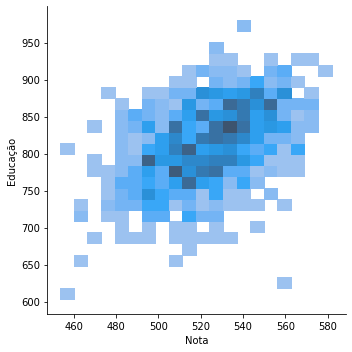

In [ ]:
plt.figure(figsize=(14, 8))
sns.displot(resultado, x ="Nota", y="Educação")

In [ ]:
resultado['Nota'] = pd.to_numeric(resultado['Nota'])
resultado['Educação'] = pd.to_numeric(resultado['Educação'])

In [ ]:

class SimpleLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.formula = None
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.X = X
        self.y = y
        soma_xy = sum(X * y)
        soma_x_ao_quadrado = sum(X * X)
        soma_x = sum(X)
        soma_y = sum(y)
        n = len(X)
        media_x = X.mean()
        media_y = y.mean()
        
        # build formula y = ax + b
        a = ( soma_xy - n * media_x * media_y ) / ( soma_x_ao_quadrado - n * ( media_x ** 2 ) )
        b = media_y - (a * media_x)
        
        self.coef_ = np.array([ b ])
        self.intercept_ = np.array([ a ])
        
        self.formula = lambda _x : (a * _x) + b
    
    def predict(self, x):
        return np.array(list(map(self.formula, x)))
    
    # fonte: https://edisciplinas.usp.br/pluginfile.php/1479289/mod_resource/content/0/regr_lin.pdf
    def sum_total_quadratic(self):
        median = self.y.mean()
        return sum( ( y - median ) ** 2 )
    
    def sum_error_quadratic(self):
        predicted = self.predict(x=self.X)
        return sum( ( self.y - predicted ) ** 2 )

    def regression_quadratic_sum(self):
        return self.sum_total_quadratic() - self.sum_error_quadratic()
    
    def score(self):
        return self.regression_quadratic_sum() / self.sum_total_quadratic()

In [ ]:
resultado['Nota'] = x
resultado['Educação'] = y

x_v = pd.DataFrame(x)
y_v = pd.DataFrame(y)

In [ ]:
model = LinearRegression()
model.fit(x_v, y_v)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([[0.00109171]])